Завдання 1
Імплеметувати та порівняти з вбудованими алгоритми Краскала та Пріма

In [2]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations, groupby
import time
from networkx.algorithms import tree

In [3]:
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """

    
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))
    
    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)
                
    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)
                
    if draw:
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue', 
                    with_labels=True,
                    node_size=500, 
                    arrowsize=20, 
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)

        else:
            nx.draw(G, node_color='lightblue',
                with_labels=True,
                node_size=500)

    return G


In [4]:
def kruskal(G, weight: bool = False):
    """kruskal algorithm"""
    vertises_distr = [{node} for node in G.nodes()]
    minimum_spanning_tree = []
    total_weight = 0
    for v1, v2, weight in sorted(G.edges(data=True), key= lambda x: x[2]["weight"]):
        check = True
        edge = (v1, v2)
        weight = weight["weight"]
        for subset in vertises_distr:
            if set(edge).issubset(subset):
                check = False
                break
        if check:
            for subset in vertises_distr:
                if subset.intersection(set(edge)):
                    minimum_spanning_tree.append(edge)
                    total_weight += weight
                    adds = []
                    for i, subset in enumerate(vertises_distr):
                        if subset.intersection(edge):
                            adds.append(i)
                            if len(adds) == 2:
                                break
                    vertises_distr[adds[0]] = vertises_distr[adds[0]].union(vertises_distr[adds[1]])
                    vertises_distr.pop(adds[1])
                    break
    return minimum_spanning_tree, total_weight if weight else minimum_spanning_tree    


In [5]:
def prim(G, weight: bool = False):
    """prim algorithm"""

    S =0
    total_weight = 0
    mst = []
    nodes = set()
    wght = []
    nodes.add(S)
    edges = [((S, edge[0]),) + (edge[-1]["weight"],) for edge in G.adj[S].items()]
    while len(mst) + 1< len(G.nodes):
        min_edge, min_weight = min(edges, key = lambda x: x[-1])
        if min_edge[0] in nodes and min_edge[1] in nodes:
            edges.remove((min_edge, min_weight))
            continue
        wght.append((min_edge, min_weight))
        nodes.add(min_edge[0])
        nodes.add(min_edge[1])
        mst.append(min_edge)
        total_weight += min_weight
        edges.extend([((min_edge[1], edge[0]),) + (edge[-1]["weight"],) for edge in G.adj[min_edge[1]].items()])
        edges.remove((min_edge, min_weight))
        edges.remove((min_edge[::-1], min_weight))
    return mst, total_weight if weight else mst


In [8]:

kruskal_my_perf_all = []
kruskal_bin_perf_all = []

prim_my_perf_all = []
prim_bin_perf_all = []

for prob in [0.1, 0.3, 0.6, 1]:
    kruskal_my_perf = []
    kruskal_bin_perf = []

    prim_my_perf = []
    prim_bin_perf = []

    for num_nodes in [5, 10, 20, 50, 100, 200]:
        prim_my_avg = []
        prim_bin_avg = []

        kruskal_my_avg = []
        kruskal_bin_avg = []
        for _ in range(10):
            G = gnp_random_connected_graph(num_nodes, prob, False, False)

            start = time.time()
            my_mstk = kruskal(G, weight = True)
            end = time.time()
            performace_time = end - start
            start_bin = time.time()
            mstk_ = tree.minimum_spanning_tree(G, algorithm="kruskal")
            end_bin = time.time()
            performace_time_builtin = end_bin - start_bin

            kruskal_my_avg.append(performace_time)
            kruskal_bin_avg.append(performace_time_builtin)

            start = time.time()
            my_mstk = prim(G, weight = True)
            end = time.time()
            performace_time = end - start
            start_bin = time.time()
            mstp_ = tree.minimum_spanning_tree(G, algorithm="prim")
            end_bin = time.time()
            performace_time_2 = end_bin - start_bin

            prim_my_avg.append(performace_time)
            prim_bin_avg.append(performace_time_builtin)


        kruskal_my_perf.append((num_nodes, sum(kruskal_my_avg) / 10))
        kruskal_bin_perf.append((num_nodes, sum(kruskal_bin_avg)/10))

        prim_my_perf.append((num_nodes, sum(prim_my_avg)/10))
        prim_bin_perf.append((num_nodes, sum(prim_bin_avg)/10))
    
    kruskal_my_perf_all.append((prob, kruskal_my_perf))
    kruskal_bin_perf_all.append((prob, kruskal_bin_perf))

    prim_my_perf_all.append((prob, prim_my_perf))
    prim_bin_perf_all.append((prob, prim_bin_perf))



print(f"{kruskal_my_perf_all = }")
print(f"{kruskal_bin_perf_all = }")

print(f"{prim_my_perf_all = }")
print(f"{prim_bin_perf_all = }")
        # print(f"nodes:{num_nodes}   {performace_time = }")
        # print(f"nodes:{num_nodes}   {performace_time_builtin = }")
        # print(sum(mstk_.get_edge_data(*edge)["weight"] for edge in mstk_.edges()))
        # print("////////////////////////////////////////////////////")
        # print(my_mstk[-1])

kruskal_my_perf_all = [(0.1, [(5, 8.041858673095703e-05), (10, 0.00019795894622802733), (20, 0.00029985904693603517), (50, 0.0016158580780029296), (100, 0.0033391714096069336), (200, 0.011285877227783203)]), (0.3, [(5, 7.448196411132812e-05), (10, 9.369850158691406e-05), (20, 0.00023751258850097657), (50, 0.0011128425598144532), (100, 0.004744935035705567), (200, 0.025475144386291504)]), (0.6, [(5, 3.354549407958984e-05), (10, 0.00011696815490722657), (20, 0.0003276348114013672), (50, 0.0020903825759887697), (100, 0.007779216766357422), (200, 0.031069278717041016)]), (1, [(5, 3.561973571777344e-05), (10, 8.997917175292968e-05), (20, 0.00037407875061035156), (50, 0.0020692825317382814), (100, 0.00821855068206787), (200, 0.05748460292816162)])]
kruskal_bin_perf_all = [(0.1, [(5, 0.00014390945434570313), (10, 0.00016605854034423828), (20, 0.0003389596939086914), (50, 0.0012614727020263672), (100, 0.001932835578918457), (200, 0.0057563304901123045)]), (0.3, [(5, 0.0001483917236328125), (10

Отже розглянемо приклад з заповненістю 0.6

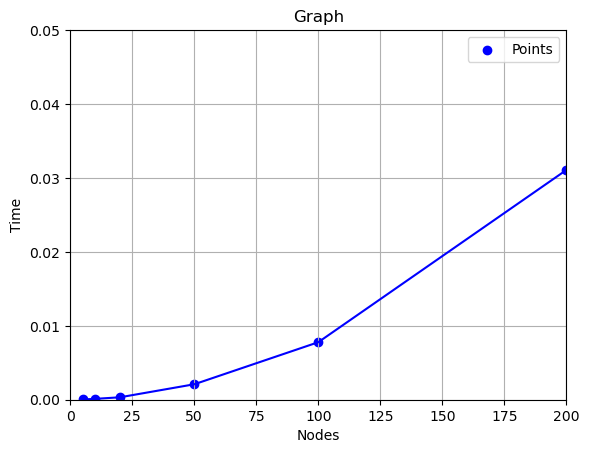

In [11]:


coordinates = kruskal_my_perf_all[2][1]

x_values = [coord[0] for coord in coordinates]
y_values = [coord[1] for coord in coordinates]

fig, ax = plt.subplots()

ax.scatter(x_values, y_values, color='blue', label='Points')

ax.set_xlim(0, 200)
ax.set_ylim(0, 0.05)

ax.grid(True)

ax.legend()

ax.set_xlabel('Nodes')
ax.set_ylabel('Time')
ax.set_title('Graph')
ax.plot(x_values, y_values, color='blue', label='Points')


plt.show()


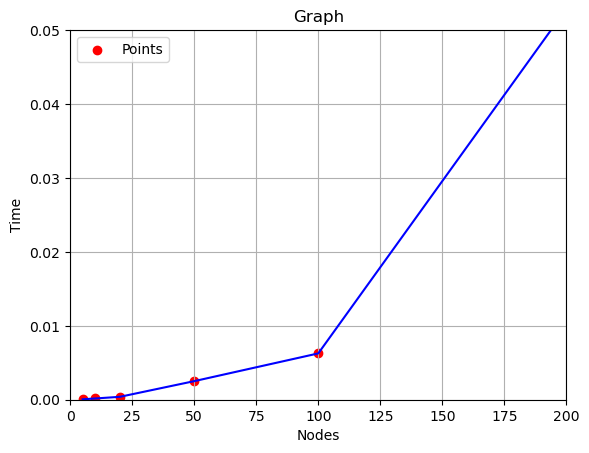

In [12]:


coordinates = kruskal_bin_perf_all[2][1]

x_values = [coord[0] for coord in coordinates]
y_values = [coord[1] for coord in coordinates]

fig, ax = plt.subplots()

ax.scatter(x_values, y_values, color='red', label='Points')

ax.set_xlim(0, 200)
ax.set_ylim(0, 0.05)

ax.grid(True)

ax.legend()

ax.set_xlabel('Nodes')
ax.set_ylabel('Time')
ax.set_title('Graph')
ax.plot(x_values, y_values, color='red', label='Points')


plt.show()

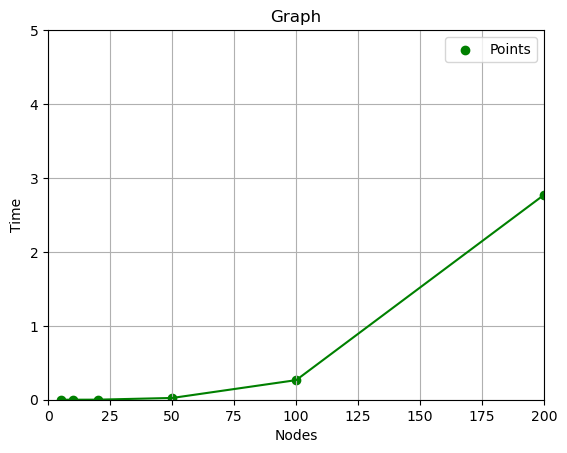

In [14]:


coordinates = prim_my_perf_all[2][1]

x_values = [coord[0] for coord in coordinates]
y_values = [coord[1] for coord in coordinates]

fig, ax = plt.subplots()

ax.scatter(x_values, y_values, color='green', label='Points')

ax.set_xlim(0, 200)
ax.set_ylim(0, 5)

ax.grid(True)

ax.legend()

ax.set_xlabel('Nodes')
ax.set_ylabel('Time')
ax.set_title('Graph')
ax.plot(x_values, y_values, color='green', label='Points')


plt.show()

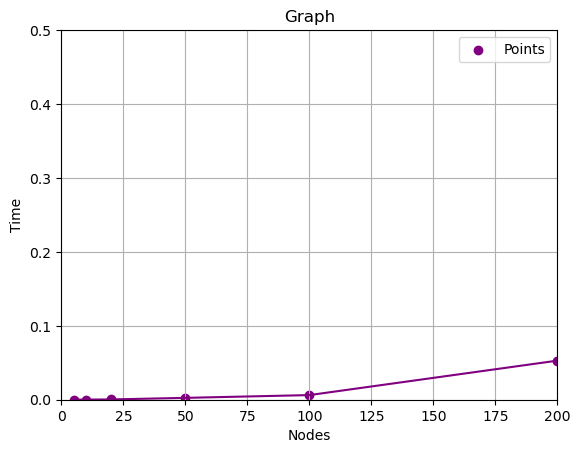

In [16]:


coordinates = prim_bin_perf_all[2][1]

x_values = [coord[0] for coord in coordinates]
y_values = [coord[1] for coord in coordinates]

fig, ax = plt.subplots()

ax.scatter(x_values, y_values, color='purple', label='Points')

ax.set_xlim(0, 200)
ax.set_ylim(0, 0.5)

ax.grid(True)

ax.legend()

ax.set_xlabel('Nodes')
ax.set_ylabel('Time')
ax.set_title('Graph')
ax.plot(x_values, y_values, color='purple', label='Points')


plt.show()